<a href="https://colab.research.google.com/github/IsraaFahmy/Statistics-and-Data-Science-Micromasters-/blob/main/MITx%2018.6501x/Notebooks/stats_w8a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Clustering analysis with Python

Compare KMeans and Gaussian Mixture models to cluster customer data and determine a marketing strategy.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#### Clustering Review

In [ ]:
X, y = make_blobs(random_state = 22)

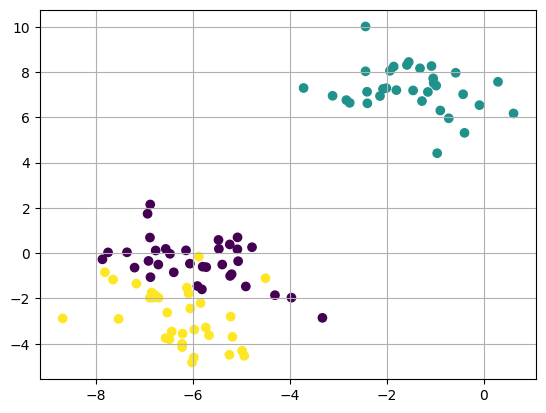

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.grid();

In [ ]:
kmeans_pipe = Pipeline([('scaler', StandardScaler()),
                        ('cluster', KMeans(n_clusters = 3))])

In [ ]:
kmeans_pipe.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('cluster', KMeans(n_clusters=3))])

In [ ]:
labels = kmeans_pipe.predict(X)

In [ ]:
labels[:10]

array([1, 1, 2, 2, 1, 0, 2, 0, 0, 1], dtype=int32)

In [ ]:
#evaluation
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X, labels)

0.7767585009345662

In [ ]:
gmm_pipe = Pipeline([('scale', StandardScaler()),
                     ('cluster', GaussianMixture(n_components = 2))])

In [ ]:
gmm_pipe.fit(X)

Pipeline(steps=[('scale', StandardScaler()),
                ('cluster', GaussianMixture(n_components=2))])

In [ ]:
labels = gmm_pipe.predict(X)

In [ ]:
silhouette_score(X, labels)

0.7767585009345662

In [ ]:
gmm_pipe.score(X)

-1.4284894566026503

In [ ]:
kmeans_pipe.score(X)

-28.341856954777768

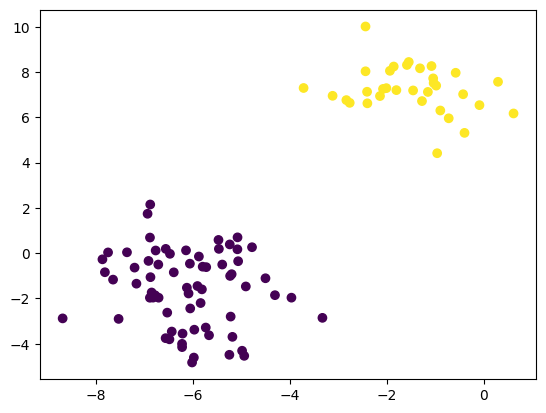

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = kmeans_pipe.predict(X))

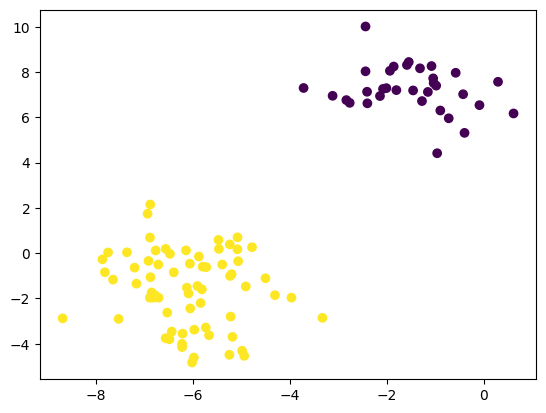

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = gmm_pipe.predict(X))

In [ ]:
gmm_pipe.named_steps['cluster'].weights_

array([0.33, 0.67])

In [ ]:
means = gmm_pipe.named_steps['cluster'].means_

In [ ]:
covs = gmm_pipe.named_steps['cluster'].covariances_

In [ ]:
import scipy.stats as stats

In [ ]:
c1_dist = stats.multivariate_normal(mean=means[0], cov = covs[0])

In [ ]:
X[0]

array([-7.65078754, -1.16799366])

In [ ]:
c1_dist.pdf(X[0])

1.5635456719443412e-169

In [ ]:
gmm_pipe.predict(X)[0]

1

In [ ]:
c2_dist = stats.multivariate_normal(mean = means[1], cov = covs[1])
c2_dist.pdf(X[0])

1.038626262186118e-65

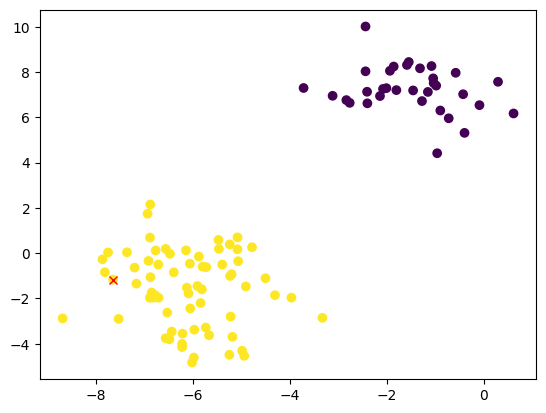

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = gmm_pipe.predict(X))
plt.plot(X[0, 0], X[0, 1], 'rx')

In [ ]:
c1_dist.pdf(X)

array([1.56354567e-169, 3.79416536e-096, 1.08383352e-073, 2.10669852e-112,
       8.84416728e-138, 8.44797641e-102, 1.53245707e-234, 1.55434873e-196,
       5.28064214e-145, 2.06714645e-162, 6.05907517e-148, 5.77621129e-161,
       6.34473601e-208, 1.26774974e-104, 4.54552197e-155, 1.79366015e-268,
       4.38774191e-260, 7.67741859e-093, 8.84343743e-067, 1.11697779e-212,
       1.31311491e-262, 4.66727331e-134, 7.29502340e-290, 7.54217389e-190,
       5.86286819e-108, 5.54123882e-256, 2.59612090e-125, 1.32152429e-091,
       8.54037570e-103, 5.31877897e-197, 3.49467428e-133, 3.94262412e-096,
       2.15878026e-126, 3.84461424e-041, 1.36988041e-163, 2.40709833e-072,
       1.30188847e-156, 4.25075170e-171, 3.80182236e-073, 1.47006036e-149,
       4.62058324e-122, 2.81131872e-088, 2.38976965e-274, 1.97317208e-173,
       4.48320860e-137, 1.36156143e-127, 1.41600963e-215, 6.59948573e-141,
       3.06373142e-245, 1.58114485e-316, 1.72795465e-105, 8.26613716e-203,
       1.92375363e-064, 5

In [ ]:
c2_dist.pdf(X)

array([1.03862626e-065, 8.07223259e-039, 1.12582422e-030, 1.32325746e-026,
       2.02224354e-064, 7.81721162e-079, 2.50485427e-060, 5.79747902e-120,
       8.28858772e-095, 4.83195535e-058, 4.41964941e-096, 1.66059230e-103,
       2.42916793e-050, 1.10010157e-028, 9.39848354e-101, 9.05420344e-068,
       6.33129011e-066, 6.05465433e-021, 6.98878914e-057, 3.03957766e-127,
       4.17773948e-058, 4.46430202e-039, 2.24380597e-070, 2.60324150e-116,
       3.82489538e-038, 1.31361095e-067, 1.09123243e-050, 2.21324751e-054,
       3.19935591e-050, 4.10591713e-056, 9.93066605e-089, 2.79292827e-035,
       8.52270544e-044, 3.11830801e-040, 1.70444297e-067, 1.21050746e-027,
       3.24348589e-101, 1.79049982e-054, 1.20058083e-025, 6.58785918e-097,
       5.50441554e-083, 8.07419844e-056, 5.26380974e-099, 5.54100672e-054,
       3.57618064e-093, 7.84113331e-086, 2.56453241e-047, 1.42946647e-093,
       2.86547449e-052, 4.42930654e-174, 8.25100683e-035, 3.27731438e-123,
       1.89326996e-026, 1

### Credit Card Data

Your goal is to cluster the data and compare different clustering algorithms to determine a few meaningful clusters that can determine a marketing strategy.

- Select features
- Prepare the data
- Cluster
- Compare clusters descriptive stats



In [ ]:
credit = pd.read_csv('credit_data.csv')

In [ ]:
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
credit = credit.drop('CUST_ID', axis = 1).dropna()

In [ ]:
gmm_pipe.fit(credit)

Pipeline(steps=[('scale', StandardScaler()),
                ('cluster', GaussianMixture(n_components=2))])

In [ ]:
credit['label'] = gmm_pipe.predict(credit)

In [ ]:
credit.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,label
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1


In [ ]:
credit.groupby('label')['BALANCE'].mean()

label
0    1338.845673
1    2077.407258
Name: BALANCE, dtype: float64

In [ ]:
credit.groupby('label')['CASH_ADVANCE'].mean()

label
0    1027.299404
1     934.060214
Name: CASH_ADVANCE, dtype: float64

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lgr = LogisticRegression()

In [ ]:
X = credit.drop('label', axis = 1)
y = credit['label']

In [ ]:
lgr.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lgr.coef_

array([[-5.66043585e-04, -4.32313790e-02, -1.96277397e-02,
         2.27054159e-02,  2.14625952e-02, -1.14372788e-04,
        -9.31126400e-03,  7.54399231e-03, -1.10366050e-02,
        -5.93226855e-03, -1.08929967e-01,  2.11468216e-01,
         8.81531790e-05,  5.60377310e-04,  3.06198765e-03,
        -6.79322100e-03, -6.00873621e-01]])

In [ ]:
credit.to_csv('credit_clusters.csv')

In [ ]:
lgr.predict_proba(X)

array([[0.99776386, 0.00223614],
       [0.98360107, 0.01639893],
       [0.70596463, 0.29403537],
       ...,
       [0.88274227, 0.11725773],
       [0.97551849, 0.02448151],
       [0.01094685, 0.98905315]])

$$\frac{1}{1 + e^{ax + b}}$$